In [1]:
%matplotlib inline
import chainer
import matplotlib.pyplot as plt
import net
import numpy as np
import os

In [2]:
# set paths and paramters
out_dir_path = './result'
model_name = 'model_100.npz'
dimz = 20

In [3]:
# load a model
model = net.VAE(784, dimz, 500) 
chainer.serializers.load_npz(os.path.join(out_dir_path, model_name), model, strict=True)
model.to_cpu()

In [4]:
# load dataset
train, test = chainer.datasets.get_mnist(withlabel=False) 

In [5]:
def save_images(x, filename):
    fig, ax = plt.subplots(3, 3, figsize=(9, 9), dpi=100)
    for ai, xi in zip(ax.flatten(), x): 
        ai.imshow(xi.reshape(28, 28))
    fig.savefig(filename)

In [6]:
# encode and decode training dataset
train_ind = [1, 3, 5, 10, 2, 0, 13, 15, 17]  
x = chainer.Variable(np.asarray(train[train_ind])) 
with chainer.using_config('train', False), chainer.no_backprop_mode(): 
    x1 = model(x) 

train


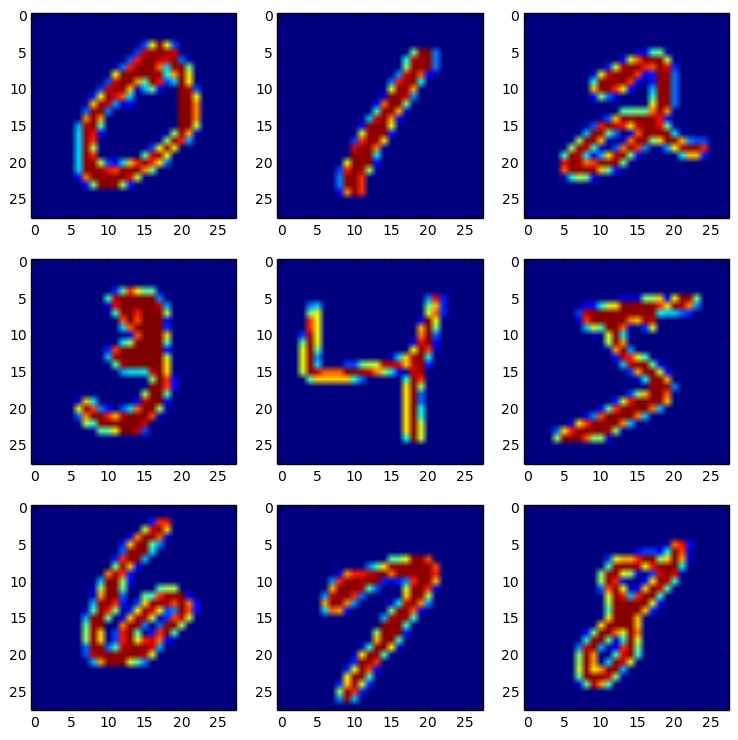

In [7]:
print('train')
save_images(x.data, os.path.join(out_dir_path, 'train')) 

train_reconstructed


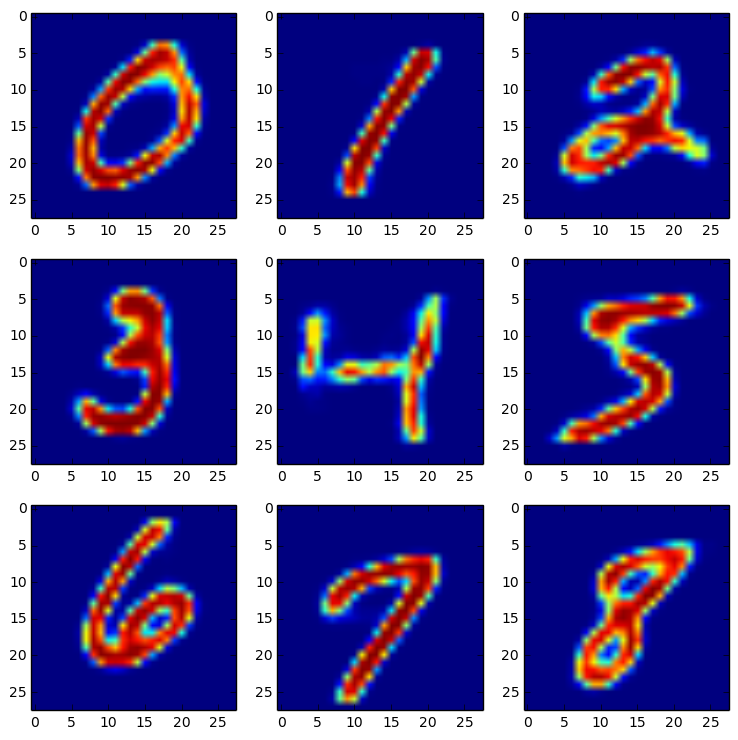

In [8]:
print('train_reconstructed')
save_images(x1.data, os.path.join(out_dir_path, 'train_reconstructed'))  

In [9]:
# # encode and decode training dataset
test_ind = [3, 2, 1, 18, 4, 8, 11, 17, 61]
x = chainer.Variable(np.asarray(test[test_ind]))
with chainer.using_config('train', False), chainer.no_backprop_mode():
    x1 = model(x)

test


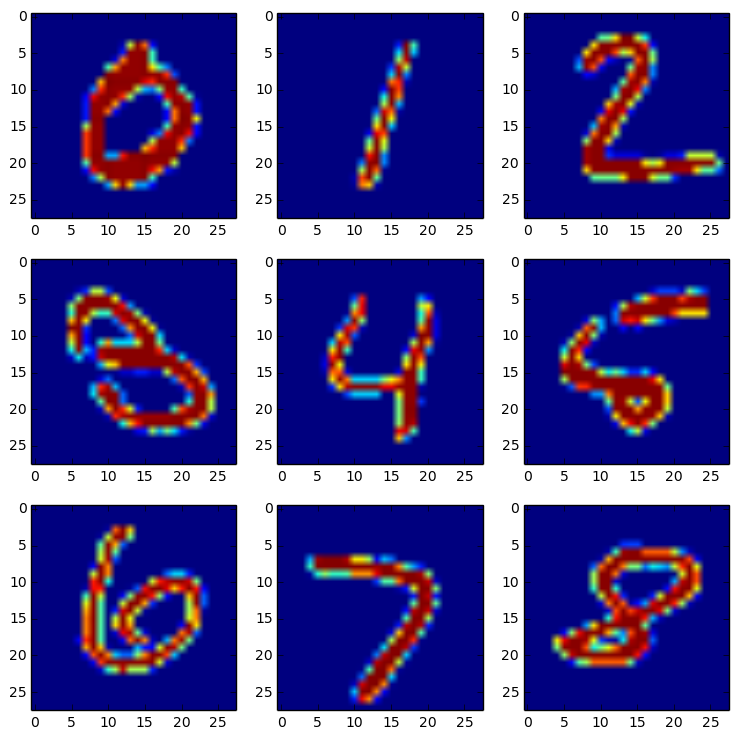

In [10]:
print('test')    
save_images(x.data, os.path.join(out_dir_path, 'test'))

test reconstructed


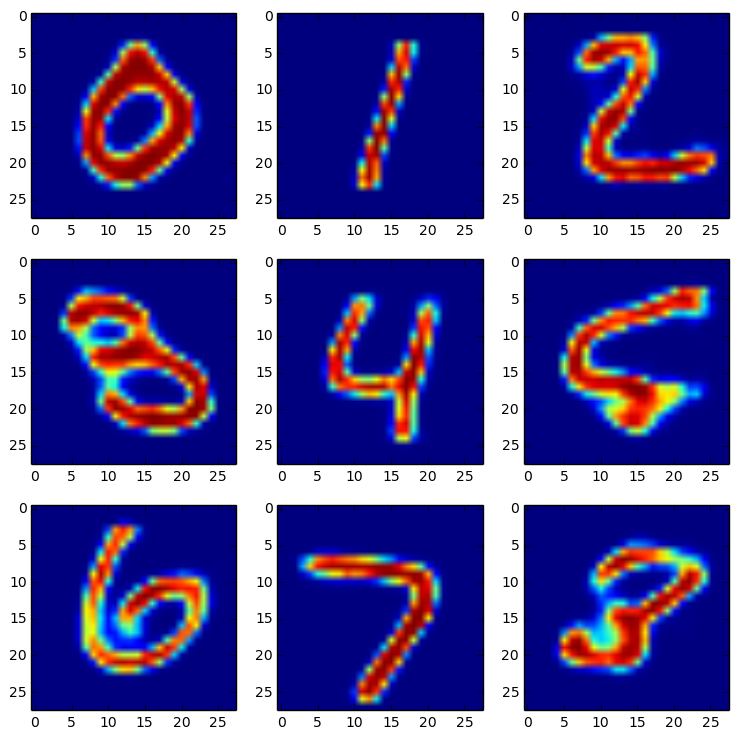

In [11]:
print('test reconstructed')
save_images(x1.data, os.path.join(out_dir_path, 'test_reconstructed'))

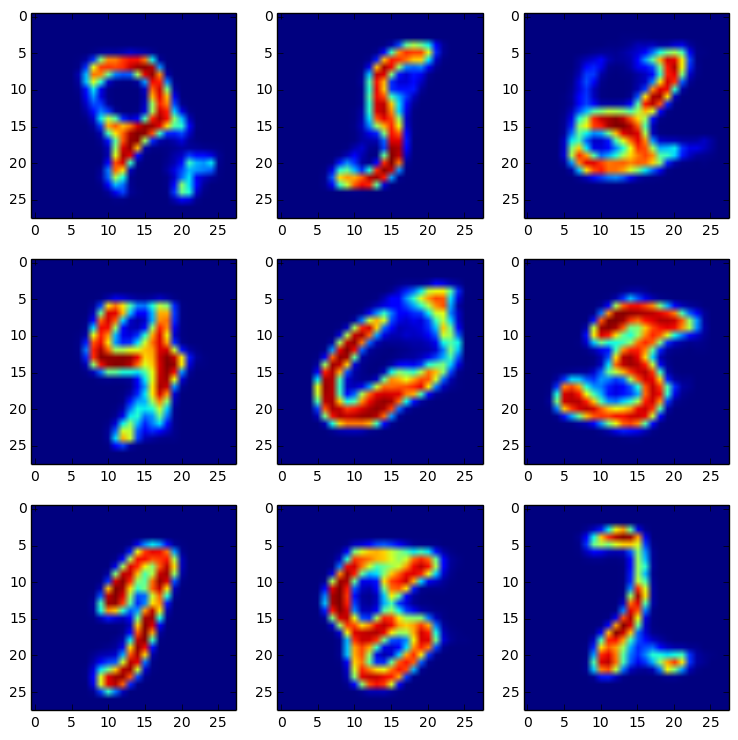

In [12]:
# draw images from randomly sampled z
z = chainer.Variable(
    np.random.normal(0, 1, (9, dimz)).astype(np.float32))
x = model.decode(z)
save_images(x.data, os.path.join(out_dir_path, 'sampled'))